<a href="https://colab.research.google.com/github/ftay16/Data-Science-Portfolio/blob/main/Food_Delivery_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# upload local csv file into colab files folder
from google.colab import files
uploaded = files.upload()

Saving foodorder_dataset.xlsx to foodorder_dataset.xlsx


In [ ]:
# import important libraries
import io
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# read csv data into dataframe and see first 5 records of data
df = pd.read_excel(io.BytesIO(uploaded['foodorder_dataset.xlsx']), sheet_name = 'food')
df.columns = ['cuisine', 'orders', 'customerid']
df.head()

,cuisine,orders,customerid
0,Fast Food,10,1
1,Cakes & Bakery,2,1
2,Western,1,1
3,Non-alcoholic Drinks,1,1
4,Chinese,4,1


In [ ]:
# Simple stats of numerical data
df.describe()

,orders,customerid
count,939.000000,939.000000
mean,4.164004,48.111821
std,5.230379,28.910185
min,1.000000,1.000000
25%,1.000000,24.000000
50%,2.000000,46.000000
75%,5.000000,73.000000
max,60.000000,100.000000


In [ ]:
# To see number of columns and their names, number of records and if there are null values and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cuisine     939 non-null    object
 1   orders      939 non-null    int64 
 2   customerid  939 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.1+ KB


<Axes: >

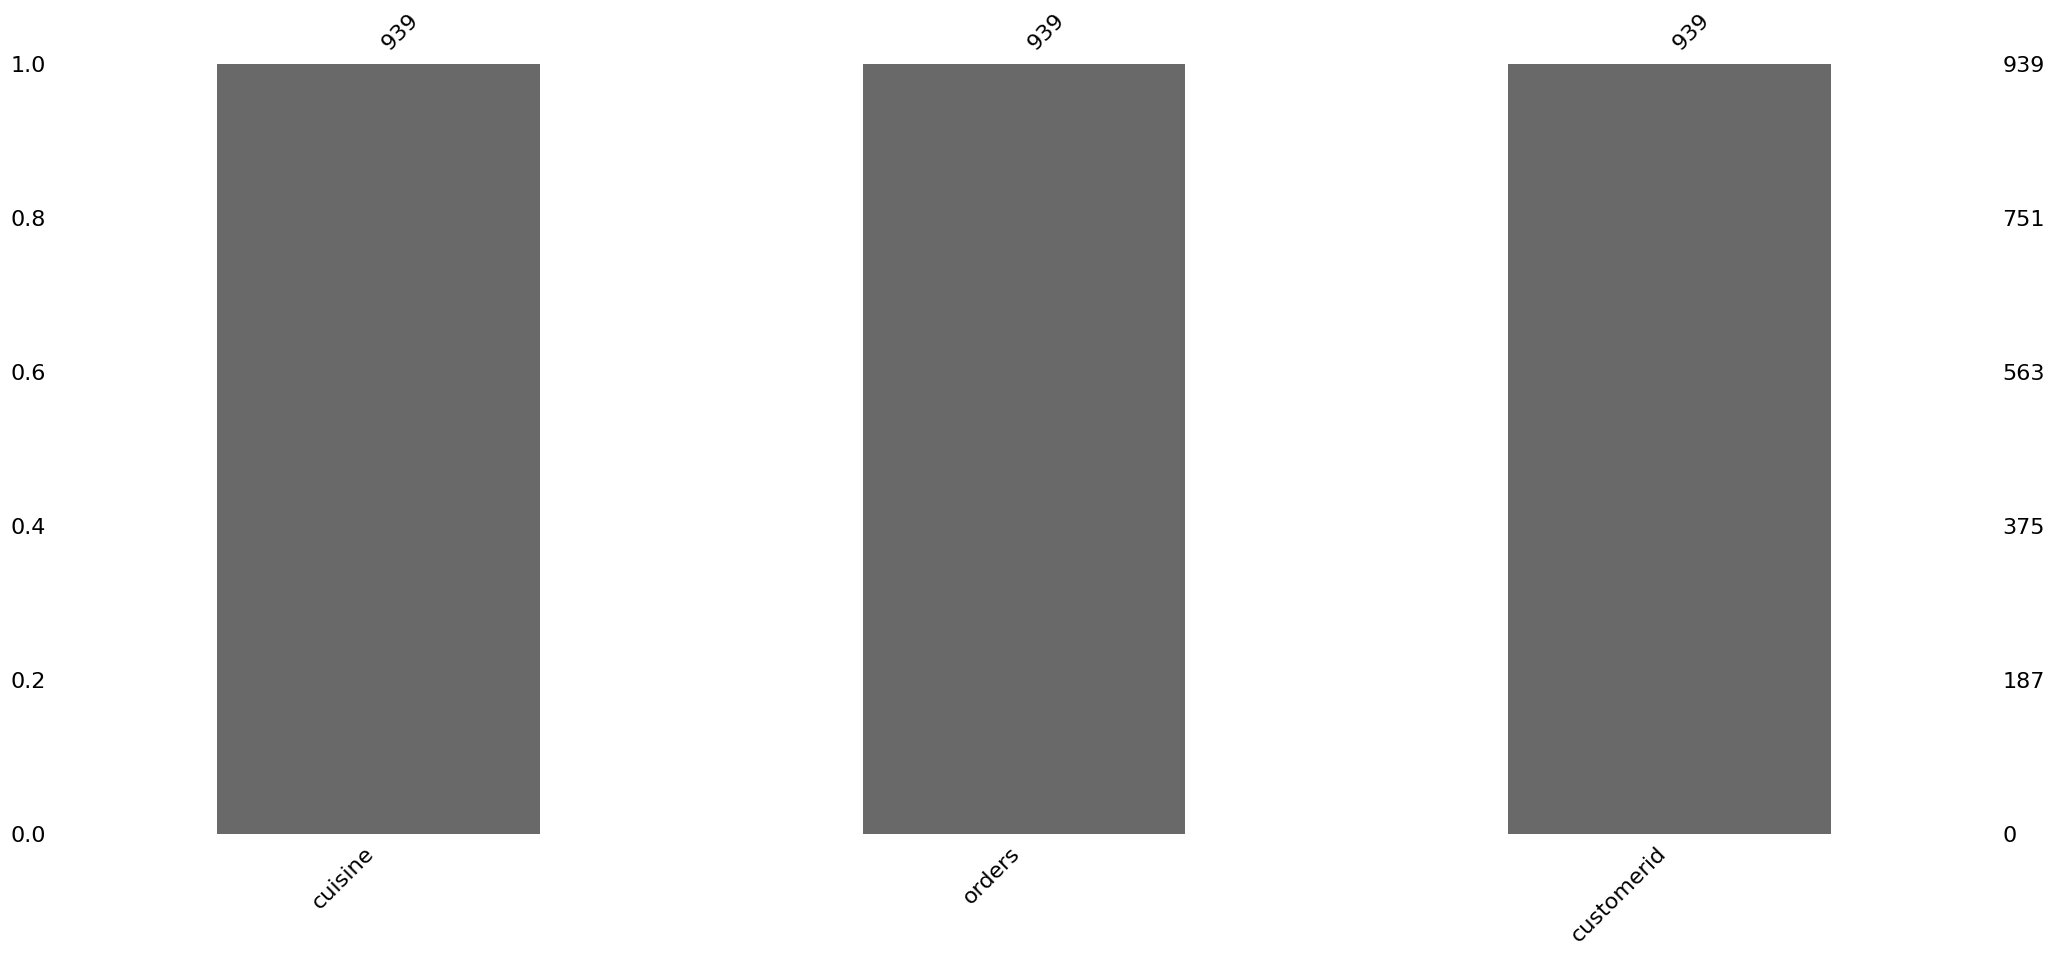

In [ ]:
# To visualise if columns contain null values
# Bar chart shows that all columns don't have null values and I can use the data as it is.
msno.bar(df)

cuisine
Chinese                 87
Singaporean             86
Fast Food               71
Western                 62
Japanese                56
Indian                  51
Non-alcoholic Drinks    47
American                44
Desserts                44
Burgers                 36
Name: customerid, dtype: int64

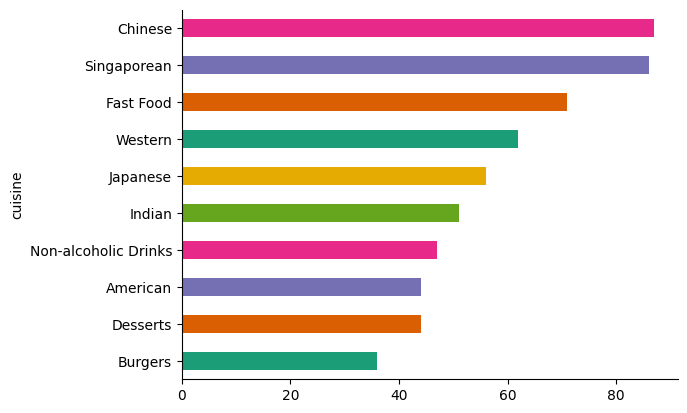

In [ ]:
# Visualise the unique count of customers by cuisine.
# Chinese and Singaporean are the top cuisines with the most customers.

df1 = df.groupby('cuisine').nunique()['customerid'].sort_values(ascending=True).tail(10)
df1.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

df.groupby('cuisine').nunique()['customerid'].sort_values(ascending=False).head(10)

cuisine
Chinese                 1007
Singaporean              714
Fast Food                316
Indian                   238
Western                  203
Japanese                 167
Non-alcoholic Drinks     163
Asian                    114
American                 104
Burgers                   81
Name: orders, dtype: int64

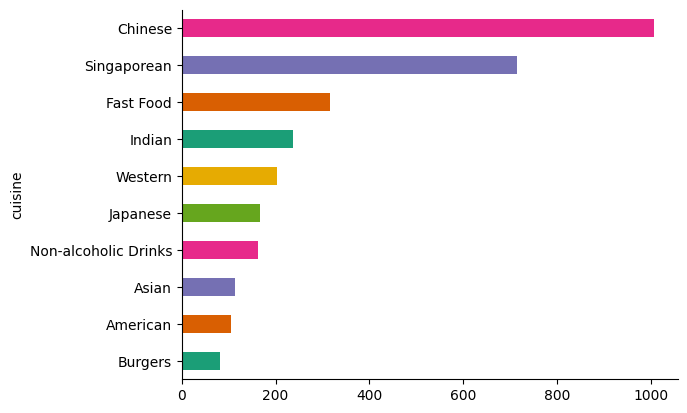

In [ ]:
# Visualise the sum of food delivery orders by cuisine.
# Chinese and Singaporean are the top cuisines with the most food delivery orders

df1 = df.groupby('cuisine').sum()['orders'].sort_values(ascending=True).tail(10)
df1.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

df.groupby('cuisine').sum()['orders'].sort_values(ascending=False).head(10)

cuisine
Filipino         18.500000
Chinese          11.574713
International     8.400000
Singaporean       8.302326
Sushi             6.000000
Indian            4.666667
Turkish           4.500000
Fast Food         4.450704
Sandwiches        3.666667
Malay             3.500000
Name: average_orders_per_customer, dtype: float64

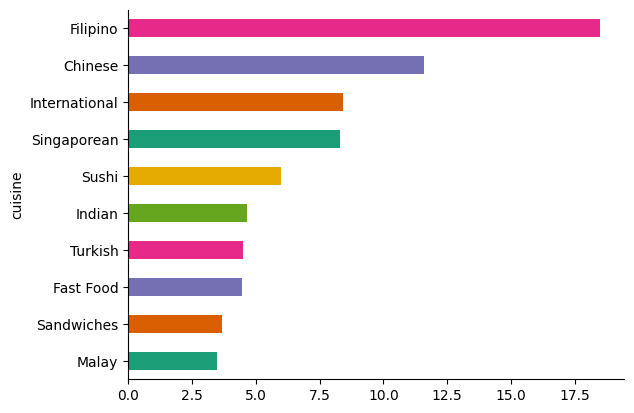

In [ ]:
# Visualise the average food delivery orders per customer by cuisine.
# Filipino and Chinese are the top cuisines with the highest food delivery orders per customer

df2 = df.groupby('cuisine').agg({'orders': 'sum', 'customerid': 'nunique'})
df2['average_orders_per_customer'] = df2['orders'] / df2['customerid']

df_avg = df2['average_orders_per_customer'].sort_values(ascending=True).tail(10)
df_avg.plot(kind='barh', y='average_orders_per_customer', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

df2['average_orders_per_customer'].sort_values(ascending=False).head(10)

In [ ]:
# User-based Collaborative Filtering Recommendation Model

# This approach is based on collaborative filtering using the sklearn library in Python. Collaborative filtering is a technique commonly used in recommendation systems, where users are recommended items (in this case, cuisines) based on the preferences and behaviors of similar users.

# Creating a User-Item matrix where rows are customers, columns are cuisines, and values are order counts
user_cuisine_m = df.pivot('customerid','cuisine','orders').fillna(0)
print(f'Shape: {user_cuisine_m.shape}')
user_cuisine_m

Shape: (100, 37)


<ipython-input-84-f7bbd4279f73>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  user_cuisine_m = df.pivot('customerid','cuisine','orders').fillna(0)


cuisine,American,Asian,Burgers,Cakes & Bakery,Chicken,Chinese,Desserts,European,Fast Food,Filipino,...,Pizza,Sandwiches,Seafood,Singaporean,Sushi,Thai,Turkish,Vegetarian,Vietnamese,Western
customerid,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,10.0,0.0,...,5.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,2.0,1.0
2,6.0,0.0,6.0,0.0,0.0,11.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,1.0,4.0
3,1.0,0.0,5.0,2.0,1.0,6.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,2.0
4,2.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0
5,4.0,2.0,0.0,0.0,1.0,4.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2.0,0.0,0.0,0.0,2.0,25.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0
97,1.0,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
98,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,2.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
# Calculating the cosine similarity matrix for users
X_user = cosine_similarity(user_cuisine_m)

In [ ]:
X_user.shape

(100, 100)

In [ ]:
X_user[:10,:11].round(2)

array([[1.  , 0.65, 0.41, 0.7 , 0.4 , 0.6 , 0.52, 0.53, 0.51, 0.62, 0.56],
       [0.65, 1.  , 0.73, 0.83, 0.47, 0.82, 0.83, 0.78, 0.7 , 0.71, 0.52],
       [0.41, 0.73, 1.  , 0.52, 0.41, 0.51, 0.67, 0.78, 0.6 , 0.32, 0.51],
       [0.7 , 0.83, 0.52, 1.  , 0.41, 0.88, 0.8 , 0.66, 0.68, 0.84, 0.47],
       [0.4 , 0.47, 0.41, 0.41, 1.  , 0.33, 0.39, 0.41, 0.28, 0.44, 0.31],
       [0.6 , 0.82, 0.51, 0.88, 0.33, 1.  , 0.78, 0.6 , 0.73, 0.85, 0.3 ],
       [0.52, 0.83, 0.67, 0.8 , 0.39, 0.78, 1.  , 0.91, 0.57, 0.52, 0.72],
       [0.53, 0.78, 0.78, 0.66, 0.41, 0.6 , 0.91, 1.  , 0.56, 0.33, 0.84],
       [0.51, 0.7 , 0.6 , 0.68, 0.28, 0.73, 0.57, 0.56, 1.  , 0.71, 0.25],
       [0.62, 0.71, 0.32, 0.84, 0.44, 0.85, 0.52, 0.33, 0.71, 1.  , 0.1 ]])

In [ ]:
# check number of unique customers. This will tally with shape of similarity matrix
df.nunique()['customerid']

100

In [ ]:
# Calculating the cosine similarity matrix for cuisines (transpose of the user_cuisine_m)
X_cuisine = cosine_similarity(user_cuisine_m.T)

In [ ]:
X_cuisine.shape

(37, 37)

In [ ]:
# check number of unique cuisines. This will tally with shape of similarity matrix
df.nunique()['cuisine']

37

In [ ]:
X_cuisine[:10,:11].round(2)

array([[1.  , 0.26, 0.29, 0.24, 0.26, 0.31, 0.24, 0.07, 0.32, 0.07, 0.  ],
       [0.26, 1.  , 0.24, 0.24, 0.12, 0.33, 0.17, 0.09, 0.34, 0.21, 0.  ],
       [0.29, 0.24, 1.  , 0.4 , 0.27, 0.34, 0.34, 0.14, 0.24, 0.  , 0.35],
       [0.24, 0.24, 0.4 , 1.  , 0.22, 0.24, 0.38, 0.16, 0.37, 0.  , 0.24],
       [0.26, 0.12, 0.27, 0.22, 1.  , 0.16, 0.28, 0.06, 0.18, 0.05, 0.5 ],
       [0.31, 0.33, 0.34, 0.24, 0.16, 1.  , 0.29, 0.22, 0.4 , 0.03, 0.03],
       [0.24, 0.17, 0.34, 0.38, 0.28, 0.29, 1.  , 0.13, 0.35, 0.  , 0.34],
       [0.07, 0.09, 0.14, 0.16, 0.06, 0.22, 0.13, 1.  , 0.08, 0.  , 0.  ],
       [0.32, 0.34, 0.24, 0.37, 0.18, 0.4 , 0.35, 0.08, 1.  , 0.  , 0.04],
       [0.07, 0.21, 0.  , 0.  , 0.05, 0.03, 0.  , 0.  , 0.  , 1.  , 0.  ]])

In [ ]:
# Function to recommend cuisines for a given user.
def cuisine_recommender(user):
    k = 20 # Number of most similar users to consider
    top_n = 3 # Number of top recommended cuisines

    # Find the index of the user in the user-cuisine matrix
    user_ix = user_cuisine_m.index.get_loc(user)

    # Retrieve similarities between the target user and all other users
    user_similarities = X_user[user_ix]

    # Identify the indices of the top-k most similar users
    most_similar_users = user_cuisine_m.index[user_similarities.argpartition(-k)[-k:]]

    # Calculate the average orders for each cuisine among the most similar users
    rec_cuisine = user_cuisine_m.loc[most_similar_users].mean(0).sort_values(ascending=False)

    # Exclude cuisines the user has already ordered
    m_seen_cuisine = user_cuisine_m.loc[user].gt(0)
    seen_cuisine = m_seen_cuisine.index[m_seen_cuisine].tolist()
    rec_cuisine = rec_cuisine.drop(seen_cuisine).head(top_n)

    return rec_cuisine

In [ ]:
# Function to show top orders for a given user
def because_user_liked(user):
    return (df[df['customerid'] == user].sort_values('orders', ascending=False).head(10))

In [ ]:
df.groupby('customerid').sum()['orders'].sort_values(ascending=False).head(10)

<ipython-input-98-3a4998d7c5cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('customerid').sum()['orders'].sort_values(ascending=False).head(10)


customerid
85    96
56    67
59    61
7     57
83    56
68    55
28    55
20    54
78    52
65    52
Name: orders, dtype: int64

In [ ]:
# Example: Display top 10 orders for a specific user
customerid = 88
because_user_liked(customerid)

,cuisine,orders,customerid
841,Singaporean,18,88
843,Chinese,16,88
839,Fast Food,4,88
840,American,2,88
844,Korean,2,88
842,Indian,1,88


In [ ]:
# Example: Display top recommended cuisines for a specific user using the collaborative filtering approach
cuisine_recommender(customerid)

cuisine
Western     1.45
Japanese    1.35
Asian       1.20
dtype: float64